# Chapter 7 - Navigation Buoys

This chapter departs from the previous formats in a couple of ways.

This time we are also using the raku Math::Polygons module to help us with some drawings.

Why? We need to use basic polygon shapes such as Rectangle and Triangle to draw our Buoy  figures. (The Polygons.ipynb and Tree.ipynb notebooks give some more examples).

In [1]:
use Physics::Navigation;
use Physics::Measure;
use Math::Polygons;

my $pos-A = Position.new( ♓️<51.5072°N>, ♓️<0.1276°W> );  say "$pos-A";
my $pos-B = Position.new( ♓️<51.5072°N>, ♓️<0.1110°W> );  say "$pos-B";

(51°30.432′N, 000°7.656′W)
(51°30.432′N, 000°6.66′W)


## Disclaimer

As with the other Chapters, this jupyter notebook is provided for illustrative purposes and it does NOT seek to be a definitive guide. It only covers a subset of the IALA standards as described on [Wikipedia](https://en.wikipedia.org/wiki/International_Association_of_Marine_Aids_to_Navigation_and_Lighthouse_Authorities#IALA_sea_mark_regions). 

DO NOT RELY ON THIS INFORMATION FOR REAL NAVIGATION PURPOSES.

## IALA System
The IALA System divides the Earth into two regions - A and B.

![diagram](https://upload.wikimedia.org/wikipedia/commons/thumb/2/25/IALA_Maritime_Buoyage_System_Regions.png/2880px-IALA_Maritime_Buoyage_System_Regions.png)

## Lateral Marks
Lateral marks are usually placed at the edge of the safe channel, either to Port or Starboard. That guides vessels safely in to shallower waters such as when returning to harbour.

Depending on the region, opposite colours apply - hopefully you can see why this distinction matters! 

Regardless of the Region, the **Outline** (or top-mark) shape is always a **Can** (square) for Port and always a **Cone** (triangle) for Starboard.

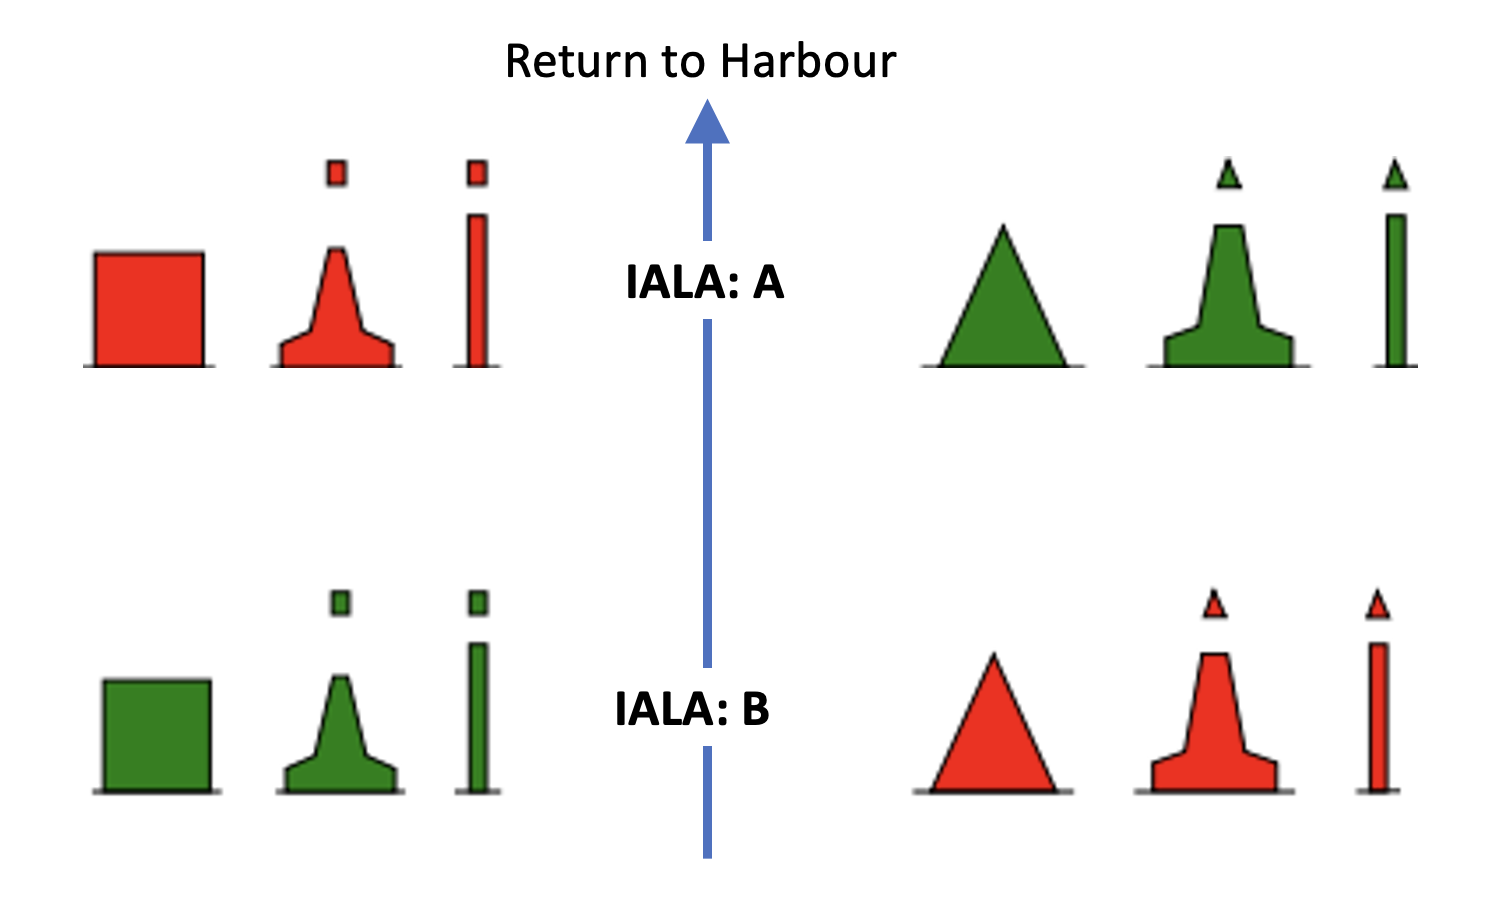

### IALA A
Applies in Europe, Africa, and most of Asia and Oceania, as well as Greenland.
- port marks are red and may have a red flashing light of any rhythm except 2+1.
- starboard marks are green and may have a green flashing light of any rhythm except 2+1.

### IALA B
Comprises the Americas, Japan, South Korea,the Philippines, Taiwan, Hawaii, and Easter Island.
- port marks are green and may have a green flashing light of any rhythm except 2+1
- starboard marks are red and may have a red flashing light of any rhythm except 2+1

Let's set the IALA Region to "A"...

In [9]:
$IALA = A;    say "IALA: $IALA";

IALA: A


## Port & Starboard Lateral Buoys

Here's how to make a PortLateral object in raku Physics::Navigation... it inherits the Buoy class and by the class definition, some attribute values. You only need to define its position. Use the say function to see what you have got.

In [3]:
my $plm = PortLateral.new( position => $pos-A );  say "$plm";

PortLateral Buoy at (51°30.432′N, 000°7.656′W)
Colours:Green. Shapes:. Outline:Can. Pattern:Solid.
Flashes green every 5 seconds



In [4]:
my $slm = StarboardLateral.new( position => $pos-B );  say "$slm";

StarboardLateral Buoy at (51°30.432′N, 000°6.66′W)
Colours:Red. Shapes:. Outline:Cone. Pattern:Solid.
Flashes red every 5 seconds



In [5]:
my $lm := $plm;     say $lm.position.Str;    #let's pick one of these

(51°30.432′N, 000°7.656′W)


Let's say I want to output just some of the atttibutes, then I can get the attribute values with an accessor method. (Colours is a list, here we just want the first item).

In [13]:
say "The outline is {$lm.outline} and the colour is {$lm.colours.first}."

The outline is Can and the colour is Red.
Trapped interrupt.  Please restart the kernel to abort execution.
Exiting Raku kernel (you may close client)


## BuoyShaped role

Since the Physics::Navigation module has no built in concept of drawing a Buoy shape, we need a little raku to help.

In [6]:
role BuoyShaped {
        has $!shape is rw;

        method elements( --> List ) {
            my $stroke := my $fill = @.colours.first.Str;
            
            given $.outline {
                when Can {
                    $!shape = Rectangle.new( :$stroke, :$fill,
                                   origin => Point.new(100,50),
                                   width  => 200, height => 200 );
                }
                when Cone {
                    $!shape = Triangle.new( :$stroke, :$fill,
                                   origin => Point.new(100,50),
                                   side   => 200 );
                }
            }
            [ $!shape ]
        }
}

(BuoyShaped)

Hint: you only need to run this declaration cell once (hit Kernel>Restart & Clear Output) if you get an error.

In [7]:
$lm does BuoyShaped;  say "{$lm.^name}";

Physics::Navigation::PortLateral+{BuoyShaped}


Hint: the ```does``` keyword applies role behaviours to an object or class.

PortLateral+{BuoyShaped} Buoy at (51°30.432′N, 000°7.656′W)
Colours:Red. Shapes:. Outline:Can. Pattern:Solid.
Flashes red every 5 seconds



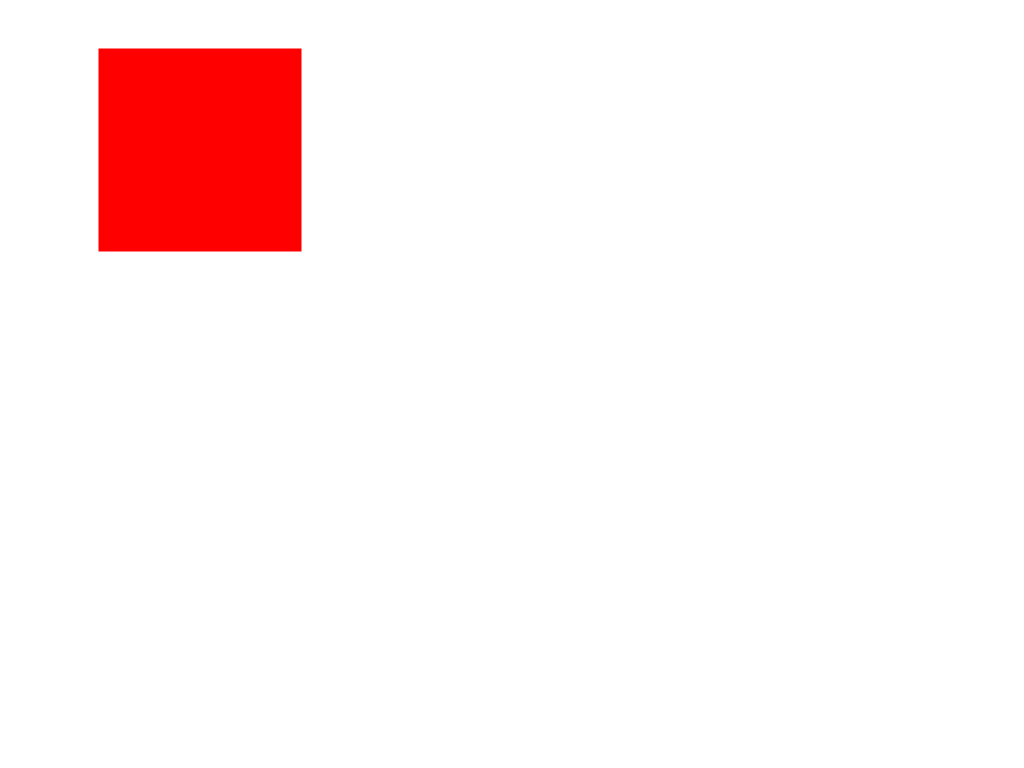

In [10]:
my $drawing = Drawing.new( elements => $lm.elements );
"$lm".say;
$drawing.serialize.say;